In [7]:
import pandas as pd

df = pd.read_csv('HitenData2013.txt', header=None, delim_whitespace=' ')
features = ['LAT', 'LON', 'LABEL', 'NTL', 'NDVI', 'RD']
df.columns = features

df = df[['LAT', 'LON', 'NTL', 'NDVI', 'RD', 'LABEL']]
df.reset_index(inplace = True, drop = True)

In [8]:
df.head()
df

,LAT,LON,NTL,NDVI,RD,LABEL
0,17.3775,78.04750,0.25143,0.46807,0.0,2
1,17.3825,78.04750,0.30026,0.43132,0.0,2
2,17.3775,78.05251,0.99153,0.46602,0.0,2
3,17.3325,78.06250,1.10459,0.38557,0.0,2
4,17.3375,78.06250,0.28864,0.40016,0.0,2
...,...,...,...,...,...,...
26438,17.5125,79.03250,0.29821,0.44256,0.0,3
26439,17.4975,79.03751,0.17744,0.41896,0.0,3
26440,17.5025,79.03751,0.18988,0.42990,0.0,3
26441,17.5075,79.03751,0.23061,0.43843,0.0,3


In [17]:
df['LABEL'].describe()

count    26443.000000
mean         2.944031
std          0.873973
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: LABEL, dtype: float64

In [18]:
test = pd.DataFrame()
test = df.loc[df['LABEL'] == 4]
test.head()

,LAT,LON,NTL,NDVI,RD,LABEL
2561,17.3325,78.0175,1.46442,0.40197,0.0,4
2567,17.3325,78.0225,1.19423,0.40727,0.0,4
2573,17.3175,78.0275,1.07576,0.40292,0.0,4
2575,17.3275,78.0275,1.73567,0.41296,0.0,4
2587,17.3175,78.0325,1.08378,0.41826,0.0,4


In [19]:
train1 = pd.DataFrame()
train1 = df.loc[df['LABEL'] == 1]

In [20]:
train2 = pd.DataFrame()
train2 = df.loc[df['LABEL'] == 2]
train3 = pd.DataFrame()
train3 = df.loc[df['LABEL'] == 3]
train = pd.DataFrame()
train = pd.concat([train1, train2, train3],ignore_index=True)

In [21]:
train['LABEL'].describe()

count    18789.000000
mean         2.513864
std          0.660064
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: LABEL, dtype: float64

In [22]:
y_col = 'LABEL'
y = train[y_col]
X = train[train.columns.drop(y_col)]
X = train[train.columns.drop(["LAT","LON"])]

In [23]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [24]:
test = test[test.columns.drop(y_col)]
test = test[test.columns.drop(['LAT','LON'])]
test

,NTL,NDVI,RD
2561,1.46442,0.40197,0.0
2567,1.19423,0.40727,0.0
2573,1.07576,0.40292,0.0
2575,1.73567,0.41296,0.0
2587,1.08378,0.41826,0.0
...,...,...,...
26296,0.94184,0.40986,0.0
26315,1.01086,0.42000,0.0
26372,0.95100,0.41337,0.0
26384,1.34980,0.42020,0.0


In [25]:
y_hat = clf.predict(test)

c:\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- LABEL

  warnings.warn(message, FutureWarning)


ValueError: X has 3 features, but SVC is expecting 4 features as input.

In [13]:
y_hat

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [14]:
test['pred'] = y_hat

In [15]:
j = 0
for i in range(len(df['LAT'])):
    if df['LABEL'][i] == 4:
        df['LABEL'][i] = y_hat[j]
        j= j+1
        

C:\Users\Hiten\AppData\Local\Temp\ipykernel_18824\758021898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LABEL'][i] = y_hat[j]


In [16]:
df.head()

,LAT,LON,NTL,NDVI,RD,LABEL
0,17.3775,78.04750,0.25143,0.46807,0.0,2
1,17.3825,78.04750,0.30026,0.43132,0.0,2
2,17.3775,78.05251,0.99153,0.46602,0.0,2
3,17.3325,78.06250,1.10459,0.38557,0.0,2
4,17.3375,78.06250,0.28864,0.40016,0.0,2


In [17]:
df.to_csv('pred_2020.txt')

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering

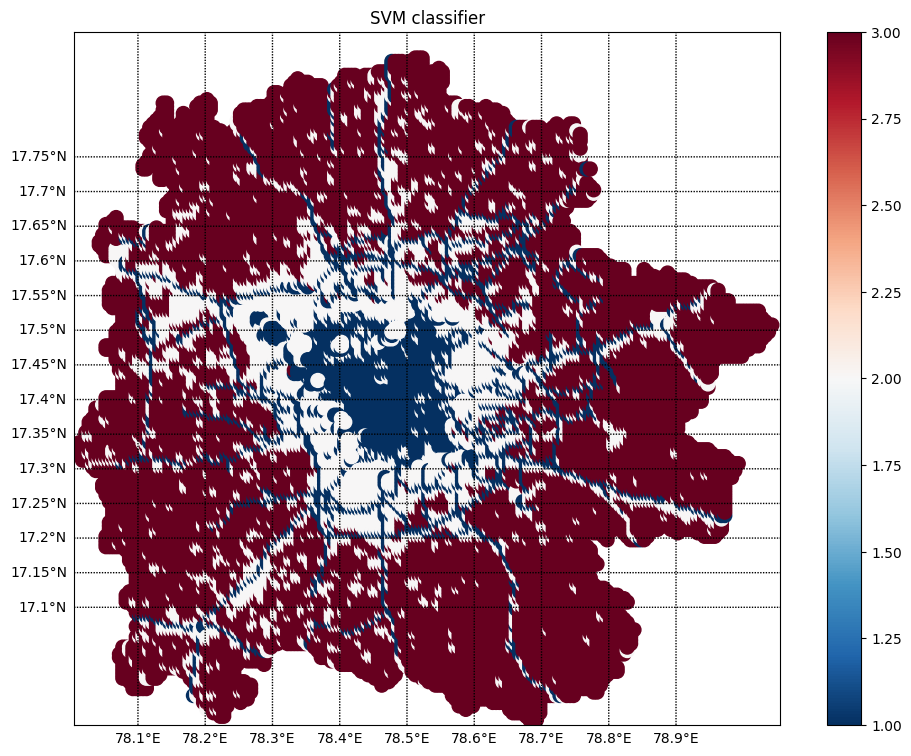

In [19]:
lat = df['LAT'][:].values
lon = df['LON'][:].values
labels = df['LABEL'][:].values

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
            llcrnrlat = 16.930,
            urcrnrlat = 17.930,
            llcrnrlon = 78.005,
            urcrnrlon = 79.055,
            resolution = 'c')
m.drawcoastlines()

x, y = m(list(df['LON']), list(df['LAT']))
m.scatter(x, y,
           c = df['LABEL'],
           s = 100,
           cmap = 'RdBu_r')
plt.colorbar()
m.drawparallels(np.arange(17.10,17.80,0.05),labels=[True,False,False,False])
m.drawmeridians(np.arange(78,78.9,0.1),labels=[0,0,0,1])
plt.title('SVM classifier')
plt.show()

In [1]:
ls

 Volume in drive F is New Volume
 Volume Serial Number is C647-F35E

 Directory of f:\BITSPilani4-1\RESPIRE\Classification\codes+data

11/14/2022  11:21 AM    <DIR>          .
11/14/2022  11:21 AM    <DIR>          ..
10/24/2022  01:46 AM             3,906 cluster.py
10/24/2022  01:44 AM               401 desc.csv
09/30/2022  07:12 PM         1,033,562 HitenData2013.txt
09/30/2022  12:16 AM         1,097,615 HitenData2020.txt
09/15/2022  10:58 AM         3,175,080 light2013-2020.ascii
08/05/2022  07:45 PM         3,174,960 lulc2013-2020.ascii
08/05/2022  07:45 PM         3,174,960 ndvi2013-2020.ascii
09/30/2022  07:13 PM         1,207,581 pred_2013.txt
09/15/2022  10:57 AM         3,704,260 road2013-2020.ascii
09/16/2022  03:46 PM               108 tempCodeRunnerFile.py
10/19/2022  01:44 PM             3,748 thresholding.png
11/14/2022  11:26 AM           588,246 Untitled.ipynb
              12 File(s)     17,164,427 bytes
               2 Dir(s)  275,705,413,632 bytes free


In [13]:
import pandas as pd
df_nlst = pd.read_csv('f:/BITSPilani4-1/RESPIRE/LST-Reduced/NLST_WinterHalf_13to20.txt', header=None, delim_whitespace=' ')
df_ntl = pd.read_csv('f:/BITSPilani4-1/RESPIRE/ALL-YEARS-2013-2020/light2013-2020.ascii', header=None, delim_whitespace=' ')
df_rd = pd.read_csv('f:/BITSPilani4-1/RESPIRE/ALL-YEARS-2013-2020/road2013-2020.ascii', header=None, delim_whitespace=' ')
df_lulc = pd.read_csv('f:/BITSPilani4-1/RESPIRE/ALL-YEARS-2013-2020/lulc2013-2020.ascii', header=None, delim_whitespace=' ')

In [19]:
df_2020 = pd.DataFrame()
df_2020['Road'] = df_rd[9][:].values
df_2020['Light'] = df_ntl[9][:].values
df_2020['LULC'] = df_lulc[9][:].values
df_2020['NLST'] = df_nlst[9][:].values

In [20]:
df_2020

,Road,Light,LULC,NLST
0,0.00000,0.84478,12.0,290.193582
1,0.00000,0.66205,10.0,290.348523
2,0.00000,0.55795,12.0,290.383505
3,0.00000,0.66512,10.0,290.266338
4,0.00000,0.59453,10.0,290.370783
...,...,...,...,...
26453,0.00000,0.79152,12.0,291.061873
26454,544.43805,0.57725,12.0,291.007120
26455,0.00000,0.62796,12.0,291.036352
26456,0.00000,0.76583,12.0,291.065607


In [21]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
#predict the labels of clusters.
X = df_2020.drop('LULC',axis=1)
label = clustering.fit_predict(X)

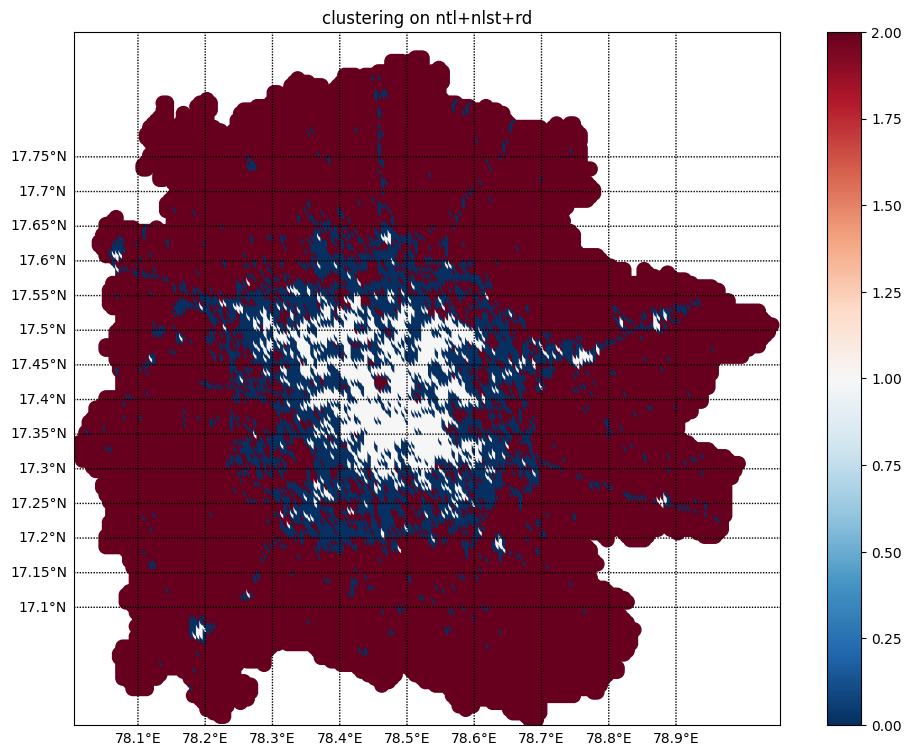

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
# %matplotlib inline
from mpl_toolkits.basemap import Basemap
lat = df_rd[0][:].values
lon = df_rd[1][:].values
labels = label

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 16.930,
           urcrnrlat = 17.930,
           llcrnrlon = 78.005,
           urcrnrlon = 79.055,
           resolution = 'c')
m.drawcoastlines()

x, y = m(list(df_rd[1]), list(df_rd[0]))
m.scatter(x, y,
          c = label,
          s = 100,
          cmap = 'RdBu_r')

plt.colorbar()

m.drawparallels(np.arange(17.10,17.80,0.05),labels=[True,False,False,False])
m.drawmeridians(np.arange(78,78.9,0.1),labels=[0,0,0,1])
plt.title("clustering on ntl+nlst+rd")
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
#predict the labels of clusters.
X = df_2020
label = clustering.fit_predict(X)

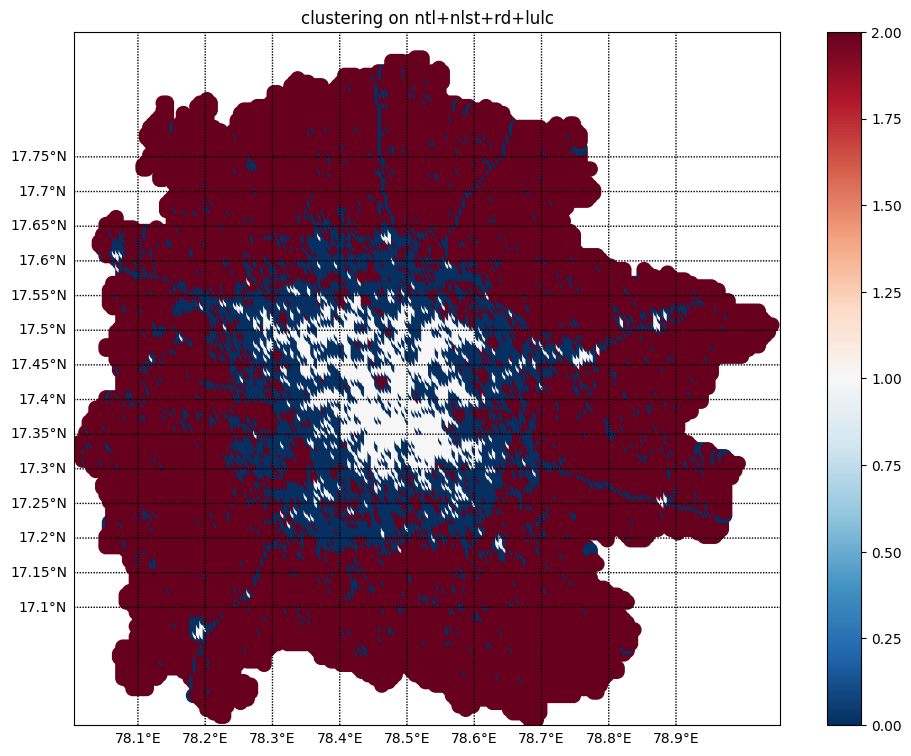

In [28]:
lat = df_rd[0][:].values
lon = df_rd[1][:].values
labels = label

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 16.930,
           urcrnrlat = 17.930,
           llcrnrlon = 78.005,
           urcrnrlon = 79.055,
           resolution = 'c')
m.drawcoastlines()

x, y = m(list(df_rd[1]), list(df_rd[0]))
m.scatter(x, y,
          c = label,
          s = 100,
          cmap = 'RdBu_r')

plt.colorbar()

m.drawparallels(np.arange(17.10,17.80,0.05),labels=[True,False,False,False])
m.drawmeridians(np.arange(78,78.9,0.1),labels=[0,0,0,1])
plt.title("clustering on ntl+nlst+rd+lulc")
plt.show()